Target Column is Survived Column

1. 0 is not survived and 1 is Survived

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data=sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
data.isnull().sum()[data.isnull().sum()>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [8]:
data.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [9]:
data.sex.value_counts(normalize=True)

sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [10]:
pd.crosstab(data.sex, data.alive)

alive,no,yes
sex,,
female,81,233
male,468,109


<Axes: >

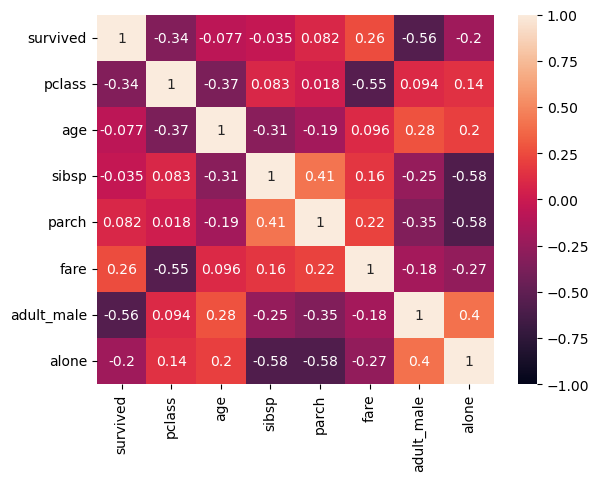

In [11]:
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1)

In [12]:

to_drop=[ 'embark_town',
       'alive',
        'deck'
        ]

In [13]:
data.drop(columns=to_drop, inplace=True)

In [14]:
data.age.fillna(data.age.mean(), inplace=True)
data.embarked.fillna(data.embarked.mode()[0], inplace=True)

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_28096\288345759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.age.fillna(data.age.mean(), inplace=True)
C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_28096\288345759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [15]:
data.fare[data.fare>300]=300

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_28096\629799156.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.fare[data.fare>300]=300
C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_28096\629799156.py:1: SettingWithCopyWarning

In [16]:
data.fare[data.fare>300]

Series([], Name: fare, dtype: float64)

In [17]:
data.drop(columns='class', inplace=True)

In [18]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


In [19]:
data["child"]=data.who.replace({'man':0, 'woman':0, 'child':1})

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_28096\1139699905.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["child"]=data.who.replace({'man':0, 'woman':0, 'child':1})


In [20]:
data["family"]=data.sibsp+data.parch

In [21]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,child,family
0,0,3,male,22.0,1,0,7.2500,S,man,True,False,0,1
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False,0,1
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True,0,0
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False,0,1
4,0,3,male,35.0,0,0,8.0500,S,man,True,True,0,0


In [22]:
data.drop(columns=['who','adult_male','sibsp','parch'],inplace=True)

In [23]:
data.head()

,survived,pclass,sex,age,fare,embarked,alone,child,family
0,0,3,male,22.0,7.2500,S,False,0,1
1,1,1,female,38.0,71.2833,C,False,0,1
2,1,3,female,26.0,7.9250,S,True,0,0
3,1,1,female,35.0,53.1000,S,False,0,1
4,0,3,male,35.0,8.0500,S,True,0,0


In [24]:
pd.get_dummies(data).head()

,survived,pclass,age,fare,alone,child,family,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,7.2500,False,0,1,False,True,False,False,True
1,1,1,38.0,71.2833,False,0,1,True,False,True,False,False
2,1,3,26.0,7.9250,True,0,0,True,False,False,False,True
3,1,1,35.0,53.1000,False,0,1,True,False,False,False,True
4,0,3,35.0,8.0500,True,0,0,False,True,False,False,True


In [25]:
data=pd.get_dummies(data,drop_first=True).astype(float).copy()
data.head()

,survived,pclass,age,fare,alone,child,family,sex_male,embarked_Q,embarked_S
0,0.0,3.0,22.0,7.2500,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,1.0,38.0,71.2833,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.0500,1.0,0.0,0.0,1.0,0.0,1.0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x,xt,y,yt =train_test_split(data.drop(columns="survived"),
                            data.survived,
                            test_size=.10,
                            random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms=MinMaxScaler()

In [30]:
x[["fare","age"]].head()

,fare,age
165,20.5250,9.000000
541,31.2750,9.000000
625,32.3208,61.000000
388,7.7292,29.699118
76,7.8958,29.699118


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

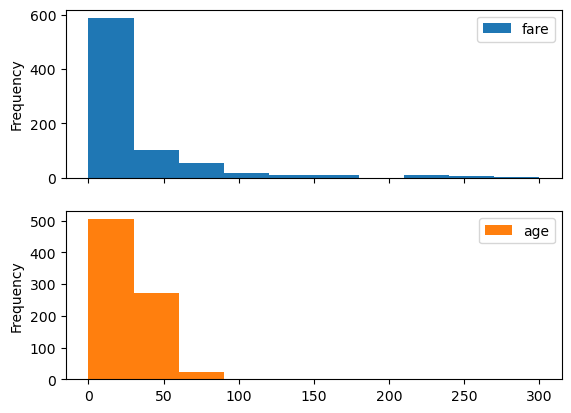

In [31]:
x[["fare","age"]].plot(kind="hist",subplots=True)

In [32]:
mms.fit_transform(x[["fare","age"]])[:10]

array([[0.06841667, 0.10781603],
       [0.10425   , 0.10781603],
       [0.107736  , 0.76124654],
       [0.025764  , 0.36792055],
       [0.02631933, 0.36792055],
       [0.02618067, 0.34656949],
       [0.17333333, 0.59788892],
       [0.02683333, 0.560191  ],
       [0.04333333, 0.44709726],
       [0.02631933, 0.33400352]])

In [33]:
x[["fare","age"]]=mms.fit_transform(x[["fare","age"]]) 
xt[["fare","age"]]=mms.transform(xt[["fare","age"]]) 

In [34]:
x.head()

,pclass,age,fare,alone,child,family,sex_male,embarked_Q,embarked_S
165,3.0,0.107816,0.068417,0.0,1.0,2.0,1.0,0.0,1.0
541,3.0,0.107816,0.104250,0.0,1.0,6.0,0.0,0.0,1.0
625,1.0,0.761247,0.107736,1.0,0.0,0.0,1.0,0.0,1.0
388,3.0,0.367921,0.025764,1.0,0.0,0.0,1.0,1.0,0.0
76,3.0,0.367921,0.026319,1.0,0.0,0.0,1.0,0.0,1.0


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

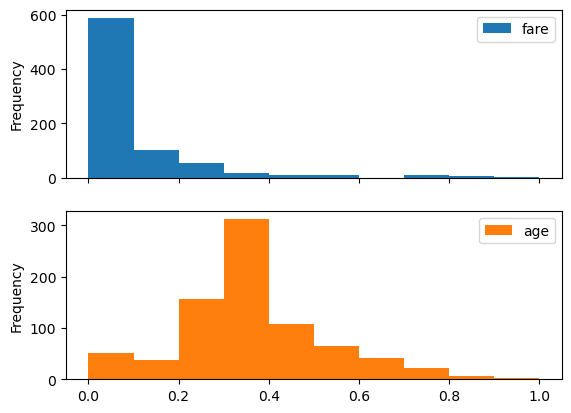

In [35]:
x[["fare","age"]].plot(kind="hist",subplots=True)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr=LogisticRegression()

In [38]:
lr.fit(x,y)

LogisticRegression()

In [39]:
res=lr.predict(xt)
res

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0.])

In [40]:
lr.score(x,y)

0.8089887640449438

In [41]:
lr.score(xt,yt)

0.8444444444444444

In [42]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score

In [43]:
confusion_matrix(yt,res)

array([[47,  7],
       [ 7, 29]], dtype=int64)

In [44]:
print(classification_report(yt,res))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        54
         1.0       0.81      0.81      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90

